## Overview
Document splitting is often a crucial preprocessing step for many applications. It involves breaking down large texts into smaller, manageable chunks. This process offers several benefits, such as ensuring consistent processing of varying document lengths, overcoming input size limitations of models, and improving the quality of text representations used in retrieval systems. There are several strategies for splitting documents, each with its own advantages.

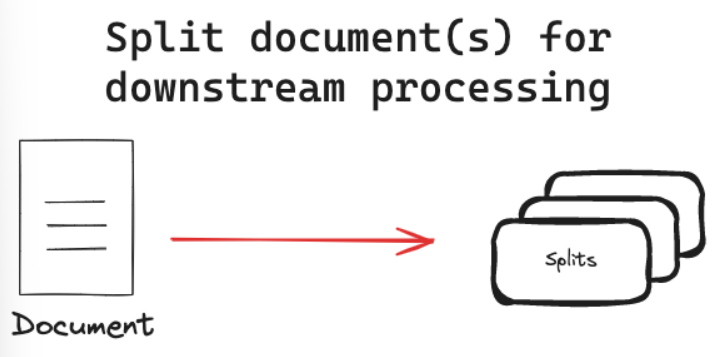

## Why split documents?
There are several reasons to split documents:

- Handling non-uniform document lengths: Real-world document collections often contain texts of varying sizes. Splitting ensures consistent processing across all documents.

- Overcoming model limitations: Many embedding models and language models have maximum input size constraints. Splitting allows us to process documents that would otherwise exceed these limits.

- Improving representation quality: For longer documents, the quality of embeddings or other representations may degrade as they try to capture too much information. Splitting can lead to more focused and accurate representations of each section.

- Enhancing retrieval precision: In information retrieval systems, splitting can improve the granularity of search results, allowing for more precise matching of queries to relevant document sections.

- Optimizing computational resources: Working with smaller chunks of text can be more memory-efficient and allow for better parallelization of processing tasks.

In [1]:
from langchain_community.document_loaders import PyMuPDFLoader
loader = PyMuPDFLoader("Attenstion all you Need.pdf")
data = loader.load()
data

[Document(metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-10T21:11:43+00:00', 'source': 'Attenstion all you Need.pdf', 'file_path': 'Attenstion all you Need.pdf', 'total_pages': 15, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-04-10T21:11:43+00:00', 'trapped': '', 'modDate': 'D:20240410211143Z', 'creationDate': 'D:20240410211143Z', 'page': 0}, page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle B

## Approaches
1. Length-based
2. Text-structured based
3. Document-structured based
4. Semantic meaning based


### Length-based
The most intuitive strategy is to split documents based on their length. This simple yet effective approach ensures that each chunk doesn't exceed a specified size limit. Key benefits of length-based splitting:

- Straightforward implementation

- Consistent chunk sizes

- Easily adaptable to different model requirements

#### Types of length-based splitting:

- Token-based: Splits text based on the number of tokens, which is useful when working with language models.

- Character-based: Splits text based on the number of characters, which can be more consistent across different types of text.

In [20]:
#Token-based
from langchain_text_splitters import TokenTextSplitter
text_splitter = TokenTextSplitter(encoding_name='cl100k_base',chunk_size=100, chunk_overlap=20)
chunks = text_splitter.split_text(data[0].page_content)
chunks

['Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗',
 '∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.pol',
 'zkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a n

In [9]:
print(len(chunks))

36


### Tokenization

cl100k_base is a specific type of tokenizer that uses a vocabulary and rules to convert text into a sequence of numerical IDs (tokens). 
https://tiktokenizer.vercel.app/?model=cl100k_base

## Best for:

Ensuring chunks fit within token constraints for language models.
Handling documents where token limits are crucial.

## Character-based

CharacterTextSplitter is one of Langchain’s simplest tools for dividing text into chunks based on a fixed character count. It is ideal for straightforward tasks where the document structure is uniform.

In [7]:
from langchain_text_splitters import CharacterTextSplitter
splitter = CharacterTextSplitter(
    separator=" ",
    chunk_size=100,  # 100 characters per chunk
    chunk_overlap=20  # 20 characters overlap
)

chunks = splitter.split_text(data[0].page_content)
print(chunks)

['Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and', 'the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is', 'works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam', 'Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob', 'Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N.', 'N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle', 'Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia', 'Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based', 'models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a', 'an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an', 'decoder through an attention\n

In [8]:
print(len(chunks))

36


## Best for:

- Homogeneous documents where each chunk is relatively equal in size.

- Simple scenarios where detailed control over chunking isn’t necessary.

## 2.Text-structured based

Text is naturally organized into hierarchical units such as paragraphs, sentences, and words. We can leverage this inherent structure to inform our splitting strategy, creating split that maintain natural language flow, maintain semantic coherence within split, and adapts to varying levels of text granularity. LangChain's RecursiveCharacterTextSplitter implements this concept:

The RecursiveCharacterTextSplitter attempts to keep larger units (e.g., paragraphs) intact.
If a unit exceeds the chunk size, it moves to the next level (e.g., sentences).
This process continues down to the word level if necessary.

In [14]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],  # Multiple delimiters to ensure efficient chunking
    chunk_size=100, chunk_overlap=20,)
chunks = text_splitter.split_text(data[0].page_content)

In [15]:
print(len(chunks))

42


## Best for:

- Handling documents with varied structures.
- Scenarios requiring optimal chunking based on specific delimiters.

### Document-structured based
Some documents have an inherent structure, such as HTML, Markdown, or JSON files. In these cases, it's beneficial to split the document based on its structure, as it often naturally groups semantically related text. Key benefits of structure-based splitting:

Preserves the logical organization of the document
Maintains context within each chunk
Can be more effective for downstream tasks like retrieval or summarization
Examples of structure-based splitting:

- Markdown: Split based on headers (e.g., #, ##, ###)
- HTML: Split using tags
- JSON: Split by object or array elements
- Code: Split by functions, classes, or logical blocks

In [17]:
from langchain_text_splitters import MarkdownHeaderTextSplitter
markdown_document = "# Foo\n\n    ## Bar\n\nHi this is Jim\n\nHi this is Joe\n\n ### Boo \n\n Hi this is Lance \n\n ## Baz\n\n Hi this is Molly"

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

[Document(metadata={'Header 1': 'Foo', 'Header 2': 'Bar'}, page_content='Hi this is Jim  \nHi this is Joe'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Bar', 'Header 3': 'Boo'}, page_content='Hi this is Lance'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Baz'}, page_content='Hi this is Molly')]

In [18]:
import json
from langchain_text_splitters import RecursiveJsonSplitter
import requests

# This is a large nested json object and will be loaded as a python dict
json_data = requests.get("https://api.smith.langchain.com/openapi.json").json()


splitter = RecursiveJsonSplitter(max_chunk_size=300)


In [20]:
# Recursively split json data - If you need to access/manipulate the smaller json chunks
json_chunks = splitter.split_json(json_data=json_data)

for chunk in json_chunks[:3]:
    print(chunk)

{'openapi': '3.1.0', 'info': {'title': 'LangSmith', 'version': '0.1.0'}, 'paths': {'/api/v1/sessions/{session_id}/dashboard': {'post': {'tags': ['tracer-sessions'], 'summary': 'Get Tracing Project Prebuilt Dashboard', 'description': 'Get a prebuilt dashboard for a tracing project.'}}}}
{'paths': {'/api/v1/sessions/{session_id}/dashboard': {'post': {'operationId': 'get_tracing_project_prebuilt_dashboard_api_v1_sessions__session_id__dashboard_post', 'security': [{'API Key': []}, {'Tenant ID': []}, {'Bearer Auth': []}]}}}}
{'paths': {'/api/v1/sessions/{session_id}/dashboard': {'post': {'parameters': [{'name': 'session_id', 'in': 'path', 'required': True, 'schema': {'type': 'string', 'format': 'uuid', 'title': 'Session Id'}}, {'name': 'accept', 'in': 'header', 'required': False, 'schema': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'title': 'Accept'}}]}}}}


In [21]:
from langchain_text_splitters import (
    Language,
    RecursiveCharacterTextSplitter,
)
PYTHON_CODE = """
def hello_world():
    print("Hello, World!")

# Call the function
hello_world()
"""
python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON, chunk_size=50, chunk_overlap=0
)
python_docs = python_splitter.create_documents([PYTHON_CODE])
python_docs

[Document(metadata={}, page_content='def hello_world():\n    print("Hello, World!")'),
 Document(metadata={}, page_content='# Call the function\nhello_world()')]

In [22]:
from langchain_text_splitters import HTMLSemanticPreservingSplitter

html_string = """
<!DOCTYPE html>
<html>
    <body>
        <div>
            <h1>Section 1</h1>
            <p>This section contains an important table and list that should not be split across chunks.</p>
            <table>
                <tr>
                    <th>Item</th>
                    <th>Quantity</th>
                    <th>Price</th>
                </tr>
                <tr>
                    <td>Apples</td>
                    <td>10</td>
                    <td>$1.00</td>
                </tr>
                <tr>
                    <td>Oranges</td>
                    <td>5</td>
                    <td>$0.50</td>
                </tr>
                <tr>
                    <td>Bananas</td>
                    <td>50</td>
                    <td>$1.50</td>
                </tr>
            </table>
            <h2>Subsection 1.1</h2>
            <p>Additional text in subsection 1.1 that is separated from the table and list.</p>
            <p>Here is a detailed list:</p>
            <ul>
                <li>Item 1: Description of item 1, which is quite detailed and important.</li>
                <li>Item 2: Description of item 2, which also contains significant information.</li>
                <li>Item 3: Description of item 3, another item that we don't want to split across chunks.</li>
            </ul>
        </div>
    </body>
</html>
"""

headers_to_split_on = [("h1", "Header 1"), ("h2", "Header 2")]

splitter = HTMLSemanticPreservingSplitter(
    headers_to_split_on=headers_to_split_on,
    max_chunk_size=50,
    elements_to_preserve=["table", "ul"],
)

documents = splitter.split_text(html_string)
print(documents)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14644\603221681.py:47: LangChainBetaWarning: The class `HTMLSemanticPreservingSplitter` is in beta. It is actively being worked on, so the API may change.
  splitter = HTMLSemanticPreservingSplitter(


[Document(metadata={'Header 1': 'Section 1'}, page_content='This section contains an important table and list'), Document(metadata={'Header 1': 'Section 1'}, page_content='that should not be split across chunks.'), Document(metadata={'Header 1': 'Section 1'}, page_content='Item Quantity Price Apples 10 $1.00 Oranges 5 $0.50 Bananas 50 $1.50'), Document(metadata={'Header 2': 'Subsection 1.1'}, page_content='Additional text in subsection 1.1 that is'), Document(metadata={'Header 2': 'Subsection 1.1'}, page_content='separated from the table and list. Here is a'), Document(metadata={'Header 2': 'Subsection 1.1'}, page_content="detailed list: Item 1: Description of item 1, which is quite detailed and important. Item 2: Description of item 2, which also contains significant information. Item 3: Description of item 3, another item that we don't want to split across chunks.")]


## LaTeX Document Processing
For academic or scientific documents written in LaTeX, LatexTextSplitter is designed to split text while respecting LaTeX-specific commands and environments.

In [23]:
from langchain.text_splitter import LatexTextSplitter

latex_text = r"""
\documentclass{article}
\begin{document}
\section{Introduction}
This is an introduction section with some text.
\section{Methodology}
This section discusses the methods used for processing the data.
\section{Conclusion}
The conclusion summarizes the findings.
\end{document}
"""

splitter = LatexTextSplitter(
    chunk_size=100,  # Adjust chunk size as needed
    chunk_overlap=20  # Adjust overlap for context retention
)

chunks = splitter.split_text(latex_text)
print(chunks)


['\\documentclass{article}\n\\begin{document}\n\\section{Introduction}\nThis is an introduction section', 'section with some text.\n\\section{Methodology}\nThis section discusses the methods used for', 'methods used for processing the data.\n\\section{Conclusion}\nThe conclusion summarizes the', 'summarizes the findings.\n\\end{document}']


In [ ]:
print(len(chunks))

4


: 